In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
from nltk.corpus import stopwords
# nltk.download('PorterStemmer')
from nltk.stem import PorterStemmer
# nltk.download('WordNetLemmatizer')
from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('FreqDist')
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/justingomez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/justingomez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justingomez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Load csv file into pandas data frame
df = pd.read_csv('All_Reviews.csv')
df.pop('Unnamed: 0')
df['review text'] = df['review text'].fillna("")
df

,filename,ranking,category,review ID,review name,reviewer's name,reviewer's profile,review rating,review date,review text,verified purchase,vine customer review of free product,images,image 1,image 2,image 3,image 4
0,Reviews/1_0984782850.csv,1.0,NaN,R32BJK81FRH8ME,A contemporary codex,@TheScott463,https://www.amazon.com/gp/profile/amzn1.accoun...,4,"August 1, 2019","Good examples, explanations, and problems. Tit...",True,False,NaN,NaN,NaN,NaN,NaN
1,Reviews/1_0984782850.csv,1.0,NaN,RCIPQTOLBAOE6,great book to solidify knowledge,A & E Ingram,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"July 6, 2020",Used this book to practice for interviewing af...,True,False,NaN,NaN,NaN,NaN,NaN
2,Reviews/1_0984782850.csv,1.0,NaN,R3VU8PXI6SI58X,This revised edition is worth purchasing. Sur...,A Reviewer,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"March 22, 2017",This revised edition is worth purchasing. Sure...,False,False,NaN,NaN,NaN,NaN,NaN
3,Reviews/1_0984782850.csv,1.0,NaN,R32XY85RY4W2LX,Must have for interview preparation!,A. P,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"December 21, 2015",This one's a must have for interview preparati...,True,False,NaN,NaN,NaN,NaN,NaN
4,Reviews/1_0984782850.csv,1.0,NaN,R21KYICVT6BKWC,The best part is,A. Quesenberry,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 10, 2017",The definitive book to help you prepare for an...,False,False,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15903,Reviews/100_1840788119.csv,100.0,NaN,R1BS8378SXGVUH,easy to read,msbetty,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"April 30, 2020",I got this for a friend who has no idea about ...,True,False,NaN,NaN,NaN,NaN,NaN
15904,Reviews/100_1840788119.csv,100.0,NaN,R3M3WGCVTP7UF5,Gift for a younng traveling man.,receivers sweet ok,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 17, 2019",WoW...I ordered this last night and it has bee...,True,False,NaN,NaN,NaN,NaN,NaN
15905,Reviews/100_1840788119.csv,100.0,NaN,R598W47BQ0DXS,Waste of paper.,relieved,https://www.amazon.com/gp/profile/amzn1.accoun...,1,"January 11, 2020",Did not provide any helpful information. Total...,True,False,NaN,NaN,NaN,NaN,NaN
15906,Reviews/100_1840788119.csv,100.0,NaN,R302EBDYXNZMS3,Nice but need larger writing for seniors,simigal42,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"September 16, 2019",Nice product but ordered in error had to trturn,True,False,NaN,NaN,NaN,NaN,NaN


# Text Mining

### Pre-processing reviews

In [3]:
#Create function to filter a review

text = 'This is a sample sentence, showing off the stop words filtration.'

stop_words = set(stopwords.words('english'))  
def filter_text(text):
    word_tokens = word_tokenize(text)  
    filtered_text = [w for w in word_tokens if not w in stop_words]
    filtered_text = []  
    for w in word_tokens:  
        if w not in stop_words:  
            filtered_text.append(w)
    return filtered_text

filtered_text = filter_text(text)
print(filtered_text) 


['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


In [4]:
#Create function to perform stemming a list of words

ps = PorterStemmer()
def stem_text(text_list):
    stemmed_words=[]
    for w in text_list:
        stemmed_words.append(ps.stem(w))
    return stemmed_words

stemmed_words = stem_text(filtered_text)
print(stemmed_words)
    

['thi', 'sampl', 'sentenc', ',', 'show', 'stop', 'word', 'filtrat', '.']


In [5]:
#Create function to lemmatize a list of words

lem = WordNetLemmatizer()
def lemmatize_text(text_list):
    lemmatized_words=[]
    for w in text_list:
        lemmatized_words.append(lem.lemmatize(w,'v'))
    return lemmatized_words

lemmatized_words = lemmatize_text(filtered_text)
print(lemmatized_words)

['This', 'sample', 'sentence', ',', 'show', 'stop', 'word', 'filtration', '.']


In [6]:
#Process all reviews and fill 'review processed' column

df['review processed'] = np.nan
for i in range(df.shape[0]):
    df['review processed'][i] = lemmatize_text(stem_text(filter_text(df['review text'][i])))
    
df

<ipython-input-6-fcf1b8e15122>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review processed'][i] = lemmatize_text(stem_text(filter_text(df['review text'][i])))
/Users/justingomez/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,filename,ranking,category,review ID,review name,reviewer's name,reviewer's profile,review rating,review date,review text,verified purchase,vine customer review of free product,images,image 1,image 2,image 3,image 4,review processed
0,Reviews/1_0984782850.csv,1.0,NaN,R32BJK81FRH8ME,A contemporary codex,@TheScott463,https://www.amazon.com/gp/profile/amzn1.accoun...,4,"August 1, 2019","Good examples, explanations, and problems. Tit...",True,False,NaN,NaN,NaN,NaN,NaN,"[good, exampl, ,, explan, ,, problem, ., titl,..."
1,Reviews/1_0984782850.csv,1.0,NaN,RCIPQTOLBAOE6,great book to solidify knowledge,A & E Ingram,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"July 6, 2020",Used this book to practice for interviewing af...,True,False,NaN,NaN,NaN,NaN,NaN,"[use, book, practic, interview, complet, schoo..."
2,Reviews/1_0984782850.csv,1.0,NaN,R3VU8PXI6SI58X,This revised edition is worth purchasing. Sur...,A Reviewer,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"March 22, 2017",This revised edition is worth purchasing. Sure...,False,False,NaN,NaN,NaN,NaN,NaN,"[thi, revis, edit, worth, purchas, ., sure, en..."
3,Reviews/1_0984782850.csv,1.0,NaN,R32XY85RY4W2LX,Must have for interview preparation!,A. P,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"December 21, 2015",This one's a must have for interview preparati...,True,False,NaN,NaN,NaN,NaN,NaN,"[thi, one, 's, must, interview, prepar, ., thi..."
4,Reviews/1_0984782850.csv,1.0,NaN,R21KYICVT6BKWC,The best part is,A. Quesenberry,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 10, 2017",The definitive book to help you prepare for an...,False,False,NaN,NaN,NaN,NaN,NaN,"[the, definit, book, help, prepar, interview, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15903,Reviews/100_1840788119.csv,100.0,NaN,R1BS8378SXGVUH,easy to read,msbetty,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"April 30, 2020",I got this for a friend who has no idea about ...,True,False,NaN,NaN,NaN,NaN,NaN,"[I, get, friend, idea, comput]"
15904,Reviews/100_1840788119.csv,100.0,NaN,R3M3WGCVTP7UF5,Gift for a younng traveling man.,receivers sweet ok,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 17, 2019",WoW...I ordered this last night and it has bee...,True,False,NaN,NaN,NaN,NaN,NaN,"[wow, ..., I, order, last, night, hand, deliv,..."
15905,Reviews/100_1840788119.csv,100.0,NaN,R598W47BQ0DXS,Waste of paper.,relieved,https://www.amazon.com/gp/profile/amzn1.accoun...,1,"January 11, 2020",Did not provide any helpful information. Total...,True,False,NaN,NaN,NaN,NaN,NaN,"[do, provid, help, inform, ., total, wast, mon..."
15906,Reviews/100_1840788119.csv,100.0,NaN,R302EBDYXNZMS3,Nice but need larger writing for seniors,simigal42,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"September 16, 2019",Nice product but ordered in error had to trturn,True,False,NaN,NaN,NaN,NaN,NaN,"[nice, product, order, error, trturn]"


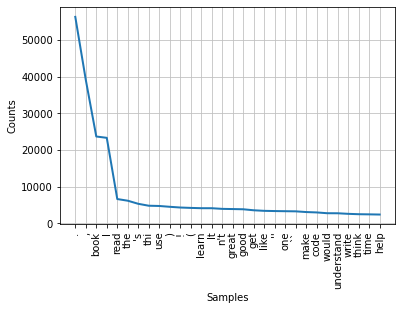

In [7]:
review = df['review processed'].copy()
rating = df['review rating'].copy()

# numStars = 5
# review = review[rating==numStars]
# rating = rating[rating==numStars]

# review = review.reset_index(drop='True')
# rating = rating.reset_index(drop='True')


entire_wordset=[]
for i in range(review.shape[0]):
    entire_wordset += review[i]

fdist = FreqDist(entire_wordset)

# Frequency Distribution Plot of the top 30 most used words
fdist.plot(30,cumulative=False)
plt.show()

# Vectorizing reviews

In [8]:
df['bag of words'] = np.nan
df

,filename,ranking,category,review ID,review name,reviewer's name,reviewer's profile,review rating,review date,review text,verified purchase,vine customer review of free product,images,image 1,image 2,image 3,image 4,review processed,bag of words
0,Reviews/1_0984782850.csv,1.0,NaN,R32BJK81FRH8ME,A contemporary codex,@TheScott463,https://www.amazon.com/gp/profile/amzn1.accoun...,4,"August 1, 2019","Good examples, explanations, and problems. Tit...",True,False,NaN,NaN,NaN,NaN,NaN,"[good, exampl, ,, explan, ,, problem, ., titl,...",NaN
1,Reviews/1_0984782850.csv,1.0,NaN,RCIPQTOLBAOE6,great book to solidify knowledge,A & E Ingram,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"July 6, 2020",Used this book to practice for interviewing af...,True,False,NaN,NaN,NaN,NaN,NaN,"[use, book, practic, interview, complet, schoo...",NaN
2,Reviews/1_0984782850.csv,1.0,NaN,R3VU8PXI6SI58X,This revised edition is worth purchasing. Sur...,A Reviewer,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"March 22, 2017",This revised edition is worth purchasing. Sure...,False,False,NaN,NaN,NaN,NaN,NaN,"[thi, revis, edit, worth, purchas, ., sure, en...",NaN
3,Reviews/1_0984782850.csv,1.0,NaN,R32XY85RY4W2LX,Must have for interview preparation!,A. P,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"December 21, 2015",This one's a must have for interview preparati...,True,False,NaN,NaN,NaN,NaN,NaN,"[thi, one, 's, must, interview, prepar, ., thi...",NaN
4,Reviews/1_0984782850.csv,1.0,NaN,R21KYICVT6BKWC,The best part is,A. Quesenberry,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 10, 2017",The definitive book to help you prepare for an...,False,False,NaN,NaN,NaN,NaN,NaN,"[the, definit, book, help, prepar, interview, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15903,Reviews/100_1840788119.csv,100.0,NaN,R1BS8378SXGVUH,easy to read,msbetty,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"April 30, 2020",I got this for a friend who has no idea about ...,True,False,NaN,NaN,NaN,NaN,NaN,"[I, get, friend, idea, comput]",NaN
15904,Reviews/100_1840788119.csv,100.0,NaN,R3M3WGCVTP7UF5,Gift for a younng traveling man.,receivers sweet ok,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"August 17, 2019",WoW...I ordered this last night and it has bee...,True,False,NaN,NaN,NaN,NaN,NaN,"[wow, ..., I, order, last, night, hand, deliv,...",NaN
15905,Reviews/100_1840788119.csv,100.0,NaN,R598W47BQ0DXS,Waste of paper.,relieved,https://www.amazon.com/gp/profile/amzn1.accoun...,1,"January 11, 2020",Did not provide any helpful information. Total...,True,False,NaN,NaN,NaN,NaN,NaN,"[do, provid, help, inform, ., total, wast, mon...",NaN
15906,Reviews/100_1840788119.csv,100.0,NaN,R302EBDYXNZMS3,Nice but need larger writing for seniors,simigal42,https://www.amazon.com/gp/profile/amzn1.accoun...,5,"September 16, 2019",Nice product but ordered in error had to trturn,True,False,NaN,NaN,NaN,NaN,NaN,"[nice, product, order, error, trturn]",NaN
